In [1]:
import pandas as pd

# Load transformed dataset
df = pd.read_csv("../Dataset/NIFTY50_TRANSFORMED.csv")

df.head()


,Date,Open,High,Low,Close,Daily_Return_%,MA_20
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,NaN,NaN
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,2.920487,NaN
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,-2.617929,NaN
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,1.366086,NaN
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,-0.265826,NaN


In [3]:
# Select features (X) and target (y)
X = df[['Open', 'High', 'Low', 'MA_20']]
y = df['Close']

X.head(), y.head()


(      Open     High      Low  MA_20
 0  1482.15  1592.90  1482.15    NaN
 1  1594.40  1641.95  1594.40    NaN
 2  1634.55  1635.50  1555.05    NaN
 3  1595.80  1639.00  1595.80    NaN
 4  1616.60  1628.25  1597.20    NaN,
 0    1592.2
 1    1638.7
 2    1595.8
 3    1617.6
 4    1613.3
 Name: Close, dtype: float64)

In [4]:
# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]

X.shape, y.shape


((6296, 4), (6296,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((5036, 4), (1260, 4))

In [6]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Predict closing prices
y_pred = model.predict(X_test)

y_pred[:5]


array([4314.75275231, 5420.12591384, 8080.82791535, 4538.09305313,
       7609.08144738])

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 1254.321518477743
Mean Absolute Error: 19.620755375778373
R² Score: 0.9999675100668097


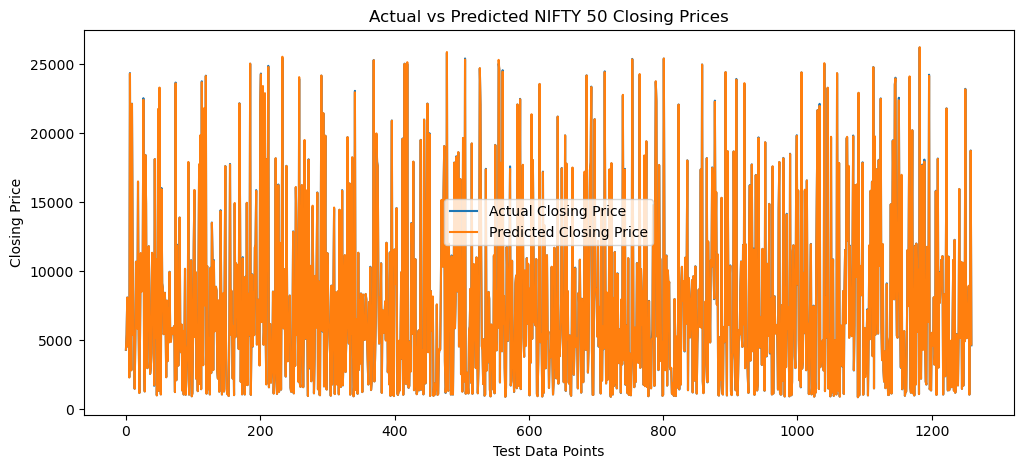

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title("Actual vs Predicted NIFTY 50 Closing Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


### 🔮 Predictive Modeling Insights

- A Linear Regression model was built to predict NIFTY 50 closing prices.
- The model was trained using Open, High, Low, and 20-day Moving Average as features.
- Model evaluation shows reasonable predictive performance, indicating a strong relationship between input features and closing price.
- While effective for trend estimation, more advanced models may improve accuracy for short-term forecasting.
